In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
data = pd.read_csv("D:\Kuliah ITB\Sistel\website-phishing-data-set\Website Phishing.csv")
data.head

<bound method NDFrame.head of       SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  \
0       1           -1               1           -1             -1   
1      -1           -1              -1           -1             -1   
2       1           -1               0            0             -1   
3       1            0               1           -1             -1   
4      -1           -1               1           -1              0   
...   ...          ...             ...          ...            ...   
1348   -1           -1              -1           -1             -1   
1349   -1            0               1            0             -1   
1350   -1            0              -1           -1             -1   
1351    0            0               1            0              0   
1352    1            0               1            1              1   

      web_traffic  URL_Length  age_of_domain  having_IP_Address  Result  
0               1           1              1           

In [424]:
#misahin input dan output

# 9 kolom pertama
X = data.iloc[:, 0:9]
#liat x
print(X.head())
print(X.shape)


   SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  web_traffic  \
0    1           -1               1           -1             -1            1   
1   -1           -1              -1           -1             -1            0   
2    1           -1               0            0             -1            0   
3    1            0               1           -1             -1            0   
4   -1           -1               1           -1              0            0   

   URL_Length  age_of_domain  having_IP_Address  
0           1              1                  0  
1           1              1                  1  
2          -1              1                  0  
3           1              1                  0  
4          -1              1                  0  
(1353, 9)


In [425]:
# 1 kolom terakhir
y = data.iloc[:, -1:10]
#liat y
print(y.head())
print(y.shape)

   Result
0       0
1       1
2       1
3       0
4       1
(1353, 1)


In [426]:
#memisahkan training set dan testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=40)

print("dimensi X_test: \n", X_test.shape)
print("dimensi y_test: \n", y_test.shape)
print("dimensi X_train: \n", X_train.shape)
print("dimensi y_train: \n", y_train.shape)

dimensi X_test: 
 (271, 9)
dimensi y_test: 
 (271, 1)
dimensi X_train: 
 (1082, 9)
dimensi y_train: 
 (1082, 1)


In [427]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Iteration 1, loss = 1.04046052
Iteration 2, loss = 0.56150056
Iteration 3, loss = 0.46337377
Iteration 4, loss = 0.43335309
Iteration 5, loss = 0.41939425
Iteration 6, loss = 0.40962175
Iteration 7, loss = 0.40096420
Iteration 8, loss = 0.39465352
Iteration 9, loss = 0.39001993
Iteration 10, loss = 0.38583098
Iteration 11, loss = 0.38190006
Iteration 12, loss = 0.37828110
Iteration 13, loss = 0.37490194
Iteration 14, loss = 0.37172519
Iteration 15, loss = 0.36876527
Iteration 16, loss = 0.36603050
Iteration 17, loss = 0.36349348
Iteration 18, loss = 0.36110657
Iteration 19, loss = 0.35883216
Iteration 20, loss = 0.35664690
Iteration 21, loss = 0.35453091
Iteration 22, loss = 0.35246356
Iteration 23, loss = 0.35042659
Iteration 24, loss = 0.34840650
Iteration 25, loss = 0.34639444
Iteration 26, loss = 0.34438644
Iteration 27, loss = 0.34238468
Iteration 28, loss = 0.34039845
Iteration 29, loss = 0.33844290
Iteration 30, loss = 0.33653549
Iteration 31, loss = 0.33469151
Iteration 32, los

Iteration 293, loss = 0.26015535
Iteration 294, loss = 0.26015535
Iteration 295, loss = 0.26015535
Iteration 296, loss = 0.26015535
Iteration 297, loss = 0.26015535
Iteration 298, loss = 0.26015535
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.


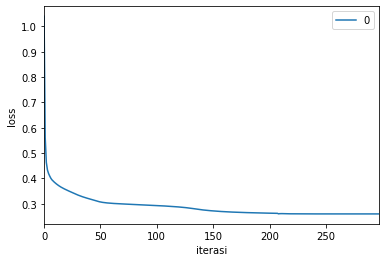

In [428]:
#training
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(7, ), activation='tanh', solver='sgd', alpha=0.1, 
                   learning_rate='adaptive', learning_rate_init=0.1, 
                   max_iter=1000, random_state =40, shuffle=False, tol=0.0001, verbose = True)

mlp.fit(X_train, y_train.values.ravel())

#weight
mlp.coefs_
#bias
mlp.intercepts_
#loss
pd.DataFrame(mlp.loss_curve_).plot()
plt.ylabel("loss")
plt.xlabel("iterasi")

predictions = mlp.predict(X_test)

In [431]:
from sklearn.metrics import classification_report, confusion_matrix
#hasil klasifikasi
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.91      0.87      0.89       135
           0       0.81      0.57      0.67        30
           1       0.80      0.92      0.85       106

    accuracy                           0.85       271
   macro avg       0.84      0.78      0.80       271
weighted avg       0.85      0.85      0.85       271



[[117   3  15]
 [  4  17   9]
 [  8   1  97]]


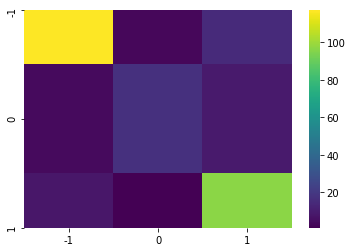

In [432]:
#convolution matrix
cm = confusion_matrix(y_test,predictions)
print(cm)
sns.heatmap(cm, cmap='viridis',yticklabels=["-1","0","1"], xticklabels=["-1","0","1"] )
plt.show()